<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/ImageSegmentation/beit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
from datasets import load_dataset
from PIL import Image
import requests

In [3]:
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')

/usr/local/lib/python3.9/dist-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(


In [ ]:
# load image
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])

In [4]:
# or load img from internet
url = "https://bahighlife.com/media/2222/breakfast-at-tiffanys-new-york-00-hero-credit-allstar-picture-library-paramount-pictures.jpg?center=0.48484848484848486,0.56497175141242939&mode=crop&width=1920&height=960&rnd=132560522060000000"
response = requests.get(url, stream=True)
response.raw.decode_content = True
image = Image.open(response.raw)

In [5]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# logits are of shape (batch_size, num_labels, height/4, width/4)
logits = outputs.logits

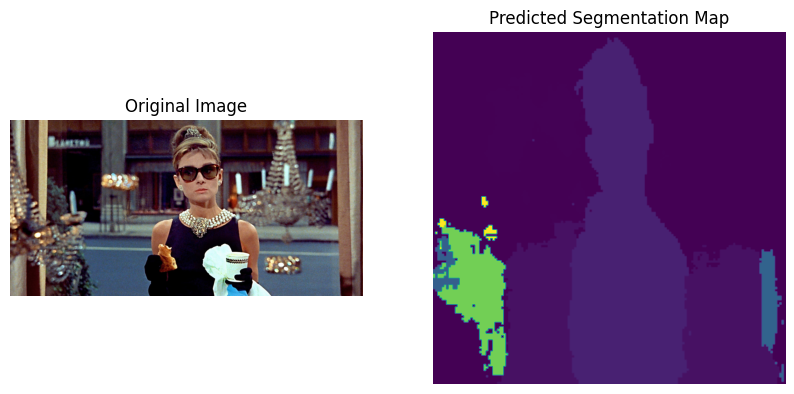

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# retrieve the predicted segmentation map
pred_map = logits.argmax(dim=1).squeeze().detach().cpu().numpy()

# plot the original image and the predicted segmentation map side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(pred_map, cmap='viridis')
ax[1].axis('off')
ax[1].set_title('Predicted Segmentation Map')
plt.show()
